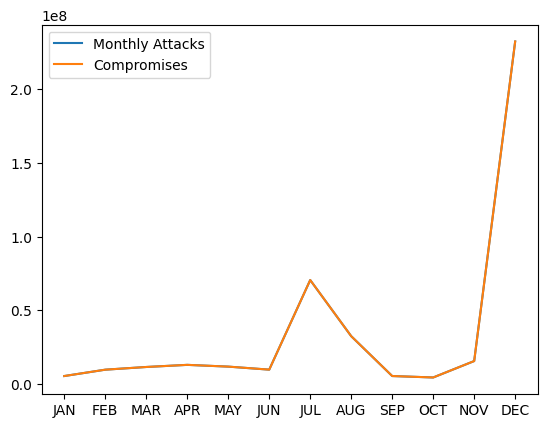

In [8]:
#2022 Data based on https://www.idtheftcenter.org/wp-content/uploads/2023/01/ITRC_2022-Data-Breach-Report_Final-1.pdf

import matplotlib.pyplot as plt

months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
victims = [5438538,9748448,11574366,13016100,11827106,9779831,70520487,32464734,5445324,4463200,15601344,232263834]
compromises = [128,121,155,133,112,168,113,184,176,160,178,174]

plt.plot(months,attacks,label='Monthly Attacks')
plt.plot(months,victims,label='Compromises')
plt.legend()

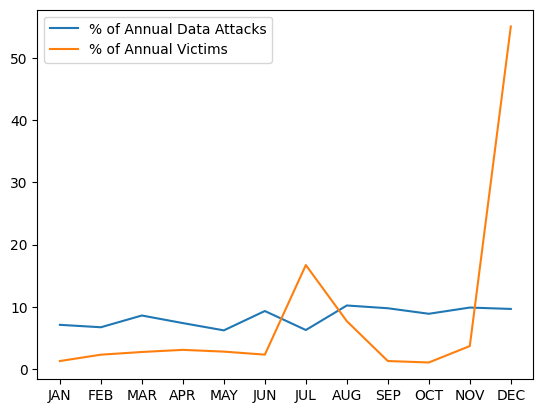

In [69]:
#2022 Data based on https://www.idtheftcenter.org/wp-content/uploads/2023/01/ITRC_2022-Data-Breach-Report_Final-1.pdf

import matplotlib.pyplot as plt

months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
victims = [5438538,9748448,11574366,13016100,11827106,9779831,70520487,32464734,5445324,4463200,15601344,232263834]
#normalize victims as % of annual victims
total_victims = 422143312
victims2 = [x*100 / total_victims for x in victims ]

compromises = [128,121,155,133,112,168,113,184,176,160,178,174]
#normalize compromises as % of annual compromises
total_compromises = 1802
compromises2 = [x*100 / total_compromises for x in compromises ]


plt.plot(months,compromises2,label='% of Annual Data Attacks')
plt.plot(months,victims2,label='% of Annual Victims')
plt.legend()

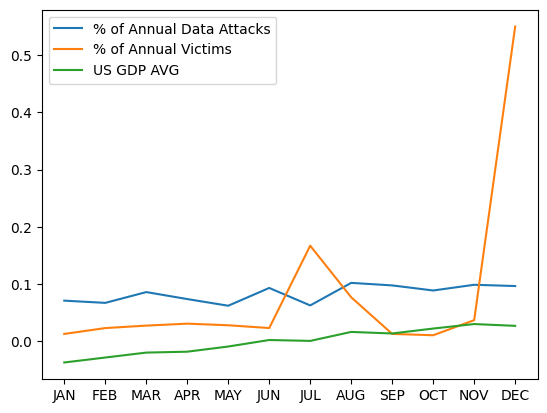

In [72]:
#2022 Compromise Data based on https://www.idtheftcenter.org/wp-content/uploads/2023/01/ITRC_2022-Data-Breach-Report_Final-1.pdf
#2022 US GDP Data based on https://ycharts.com/indicators/us_monthly_gdp
import matplotlib.pyplot as plt
import statistics

months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

victims = [5438538,9748448,11574366,13016100,11827106,9779831,70520487,32464734,5445324,4463200,15601344,232263834]
#normalize victims as % of annual victims
total_victims = 422143312
victims2 = [x / total_victims for x in victims ]

compromises = [128,121,155,133,112,168,113,184,176,160,178,174]
#normalize compromises as % of annual compromises
total_compromises = 1802
compromises2 = [x / total_compromises for x in compromises ]

GDP = [24.52,24.74,24.96,25.00,25.23,25.52,25.48,25.88,25.81,26.03,26.23,26.15]

#normalize GDP based on 2022 average GDP
avg_GDP = statistics.mean(GDP)
GDP2 = [x / avg_GDP for x in GDP]
#convert GDP2 to a positive or negative rating
GDP3 = [x - 1 for x in GDP2]



plt.plot(months,compromises2,label='% of Annual Data Attacks')
plt.plot(months,victims2,label='% of Annual Victims')
plt.plot(months,GDP3,label='US GDP AVG')
plt.legend()

[-0.01, 0.22, 0.22, 0.04, 0.23, 0.29, -0.04, 0.4, -0.07, 0.22, 0.2, -0.08]


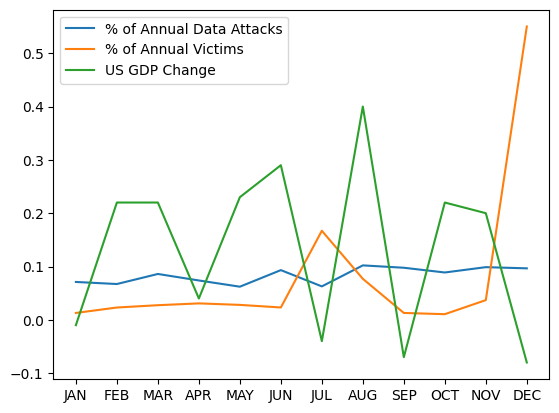

In [15]:
#2022 Compromise Data based on https://www.idtheftcenter.org/wp-content/uploads/2023/01/ITRC_2022-Data-Breach-Report_Final-1.pdf
#2022 US GDP Data based on https://ycharts.com/indicators/us_monthly_gdp
import matplotlib.pyplot as plt
import statistics

months = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

victims = [5438538,9748448,11574366,13016100,11827106,9779831,70520487,32464734,5445324,4463200,15601344,232263834]
#normalize victims as % of annual victims
total_victims = 422143312
victims2 = [x / total_victims for x in victims ]

compromises = [128,121,155,133,112,168,113,184,176,160,178,174]
#normalize compromises as % of annual compromises
total_compromises = 1802
compromises2 = [x / total_compromises for x in compromises ]

#line based on CHANGE in GDP compared to previous month
#DEC 2021 GDP = 24.53, added to front of list
GDP = [24.53,24.52,24.74,24.96,25.00,25.23,25.52,25.48,25.88,25.81,26.03,26.23,26.15]

GDP2 = []
for i in range(1, len(GDP)):
    x = round(GDP[i] - GDP[i-1],3)
    GDP2.append(x)
    
print(GDP2)
len(GDP2)

plt.plot(months,compromises2,label='% of Annual Data Attacks')
plt.plot(months,victims2,label='% of Annual Victims')
plt.plot(months,GDP2,label='US GDP Change')
plt.legend()

In [36]:
import csv
import pandas as pd

###  Function to make sure shit aint broken and is readable
def csv_tester(file_to_test):
    with open(file_to_test) as csv_file:
        reader = csv.DictReader(csv_file)
        i = 1
        for d in reader:
            while i >= 0:
                year = d['year']
                day = d['day']
                malware = d['label']
                print('This attack happened in the year', year, 'on day', day,'using',malware)
                i -= 1
                
#csv_tester('BitcoinOutput.csv')

###  Function to read amount of rows and columns of a file
def counter(file_to_count):
    df = pd.read_csv(file_to_count, on_bad_lines='skip')
    rows = df.shape[0]
    columns = df.shape[1]
    
    print('This file has', rows, 'rows, and', columns, 'columns')

counter('BitcoinHeistData.csv') # Before cleaning
counter('BitcoinLight.csv') # After cleaning




This file has 2916697 rows, and 10 columns
This file has 41413 rows, and 5 columns


In [4]:
###  Fucntions to clean data

import csv
import sqlite3

def remove_columns(input_file, output_file, columns_to_remove):
    with open(input_file, 'r') as file:
        reader = csv.reader(file)
        rows = list(reader)

    # Remove columns from each row
    for row in rows:
        for index in sorted(columns_to_remove, reverse=True):
            del row[index]

    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(rows)

#input_file = 'BitcoinHeistData.csv'
#output_file = 'BitcoinOutput.csv'
columns_to_remove = [0, 3, 4, 6, 7]  # Specify the indices of columns to remove

#remove_columns(input_file, output_file, columns_to_remove)

######################

def remove_rows(input_file, output_file, column_name, value_to_remove):
    with open(input_file, 'r') as file:
        reader = csv.DictReader(file)
        header = reader.fieldnames
        rows = [row for row in reader if row[column_name] != value_to_remove]
        
    with open(output_file, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=header)
        writer.writeheader()
        writer.writerows(rows)
        
#remove_rows('BitcoinOutput.csv', 'BitcoinLight.csv', 'label', 'white')
        
#####################

### Add a primary key to BitcoinLight so it can be used with SQL
def add_primary_key(csv_file, output_file):
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        header = reader.fieldnames

        # Add 'primary_key' to the header
        header.insert(5, 'id')

        rows = list(reader)

        # Generate primary key values and update each row
        for i, row in enumerate(rows, 1):
            row['id'] = str(i)

    with open(output_file, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=header)
        writer.writeheader()
        writer.writerows(rows)
        
add_primary_key('BitcoinLight.csv', 'BitcoinLight2.csv')


In [30]:
import pandas as pd
import mysql.connector
from tabulate import tabulate

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='F10r1daMan@@813',
    database='cybercrime',
    auth_plugin='mysql_native_password'
)

# Define your SQL query
query1 = "SELECT * FROM crime_russia"
query2 = "SELECT year,quarter,incidents FROM crime_russia"

# Read data from MySQL into a Pandas DataFrame
df = pd.read_sql_query(query1, conn)
df_test = pd.read_sql_query(query2, conn)

# Show which column has the strongest correlation with 'incidents'
corr = df.corrwith(df['incidents'])
#print(corr)

### Now I want to find correlation coefficient b/t each quarters economic health and the FOLLOWING quarters crime data
df.sort_values(['year', 'quarter'], inplace=True)
df['next_quarter_crime'] = df.groupby('year')['incidents'].shift(-1)

next_q_corr = df.corrwith(df['next_quarter_crime'], method='pearson')
#print(next_q_corr)
#print(tabulate(df_test, headers='keys',tablefmt='psql'))


# Close the connection
conn.close()


year                  0.185128
Time                  0.171366
GDP                   0.009717
GDPgr                -0.334052
M0                    0.203138
M0gr                  0.225381
BM                    0.287250
BMgr                  0.194144
Interest              0.308029
USDRUB                0.339885
EURRUB                0.351021
PPIgr                -0.193608
OIL                  -0.254696
OILgr                 0.256043
WAGE                  0.116983
WAGEgr               -0.190337
CPI                   0.002760
Inflation             0.002760
days                 -0.158776
incidents             0.653570
total_money           0.573328
next_quarter_crime    1.000000
dtype: float64


C:\Users\manue\AppData\Local\Temp\ipykernel_12740\2847643977.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query1, conn)
C:\Users\manue\AppData\Local\Temp\ipykernel_12740\2847643977.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_test = pd.read_sql_query(query2, conn)
C:\Users\manue\AppData\Local\Temp\ipykernel_12740\2847643977.py:23: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['incidents'])
C:\Users\manue\AppData\Local\Temp\ipykernel_12740\28

In [42]:
##### Testing linear regression with selected features

import pandas as pd
import mysql.connector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='F10r1daMan@@813',
    database='cybercrime',
    auth_plugin='mysql_native_password'
)

### Create dataframes and split into training/testing datasets
query1 = "SELECT * FROM crime_russia"
df = pd.read_sql_query(query1, conn)
X = df[['GDPgr','OIL','EURRUB','Interest']]
y = df['incidents']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# After splitting the data, you will have four sets: X_train (training features), X_test (testing features),
# y_train (training target variable), and y_test (testing target variable)

### Create model and begin fitting it to train data
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on testing data
y_pred = model.predict(X_test)
# Evaluate model's performance. Lower MSE and high R2 are better 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Close the MySQL connection
conn.close()

Mean Squared Error: 2155302.7500504856
R-squared Score: -0.6857867445992167


C:\Users\manue\AppData\Local\Temp\ipykernel_12740\1364046484.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query1, conn)
